In [ ]:
!cat Dataset* > Dataset.zip

In [ ]:
!unzip Dataset.zip

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  inflating: Dataset/eosinophil/EO_581610.jpg  
  inflating: Dataset/eosinophil/EO_810213.jpg  
  inflating: Dataset/eosinophil/EO_801674.jpg  
  inflating: Dataset/eosinophil/EO_761108.jpg  
  inflating: Dataset/eosinophil/EO_106564.jpg  
  inflating: Dataset/eosinophil/EO_327928.jpg  
  inflating: Dataset/eosinophil/EO_119952.jpg  
  inflating: Dataset/eosinophil/EO_376623.jpg  
  inflating: Dataset/eosinophil/EO_769223.jpg  
  inflating: Dataset/eosinophil/EO_67379.jpg  
  inflating: Dataset/eosinophil/EO_330411.jpg  
  inflating: Dataset/eosinophil/EO_233502.jpg  
  inflating: Dataset/eosinophil/EO_874796.jpg  
  inflating: Dataset/eosinophil/EO_769690.jpg  
  inflating: Dataset/eosinophil/EO_16249708.jpg  
  inflating: Dataset/eosinophil/EO_565721.jpg  
  inflating: Dataset/eosinophil/EO_673984.jpg  
  inflating: Dataset/eosinophil/EO_731641.jpg  
  inflating: Dataset/eosinophil/EO_6091.jpg  
  inflating: Dataset/eosinophil/

In [ ]:
import os
import time
import cv2
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import keras
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model,load_model
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, MaxPooling2D, MaxPool2D, Dropout
from keras.preprocessing import image
from keras.initializers import glorot_uniform
from keras.regularizers import l2
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
CLASS_NUM = 5
BATCH_SIZE = 16
IMAGE_SHAPE = (227, 227, 3)
IMAGE_TRAIN = 'Dataset'

train_datagen = ImageDataGenerator(
    rotation_range=15,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    IMAGE_TRAIN,
    target_size=(IMAGE_SHAPE[0], IMAGE_SHAPE[1]),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset="training",
    seed=123,
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    IMAGE_TRAIN,
    target_size=(IMAGE_SHAPE[0], IMAGE_SHAPE[1]),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset="validation",
    seed=123,
    shuffle=False
)

Found 8076 images belonging to 5 classes.
Found 2017 images belonging to 5 classes.


In [ ]:
def AlexNet():
    X_input = Input(IMAGE_SHAPE)
    X = Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3))(X_input)
    X = BatchNormalization()(X)
    X = MaxPool2D(pool_size=(3,3), strides=(2,2))(X)

    X = Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same")(X)
    X = BatchNormalization()(X)
    X = MaxPool2D(pool_size=(3,3), strides=(2,2))(X)

    X = Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same")(X)
    X = BatchNormalization()(X)
    
    X = Conv2D(filters=384, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same")(X)
    X = BatchNormalization()(X)

    X = Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same")(X)
    X = BatchNormalization()(X)
    X = MaxPool2D(pool_size=(3,3), strides=(2,2))(X)

    X = Flatten()(X)
    X = Dense(units=4096, activation='relu')(X)
    X = Dropout(0.5)(X)
    X = Dense(units=4096, activation='relu')(X)
    X = Dropout(0.5)(X)
    X = Dense(units=CLASS_NUM, activation='softmax')(X)

    model = Model(inputs=X_input, outputs=X, name="AlexNet")
    return model

In [ ]:
model = AlexNet()

In [ ]:
model.summary()

Model: "AlexNet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 227, 227, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 55, 55, 96)        34944     
_________________________________________________________________
batch_normalization (BatchNo (None, 55, 55, 96)        384       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 27, 27, 256)       1024      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 256)       0   

In [ ]:
optimizer = SGD(learning_rate=0.0001, momentum=0.0)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
start = time.time()
train_history = model.fit(train_generator,
          epochs=100,
          validation_data=val_generator,
          validation_freq=1)
end = time.time() - start
print("Processing time: {}".format(end))

Epoch 1/100
505/505 [==============================] - 143s 193ms/step - loss: 1.9226 - accuracy: 0.4971 - val_loss: 2.2212 - val_accuracy: 0.4036
Epoch 2/100
505/505 [==============================] - 96s 191ms/step - loss: 0.5767 - accuracy: 0.8188 - val_loss: 0.2099 - val_accuracy: 0.9326
Epoch 3/100
505/505 [==============================] - 96s 190ms/step - loss: 0.3477 - accuracy: 0.8822 - val_loss: 0.3248 - val_accuracy: 0.8994
Epoch 4/100
505/505 [==============================] - 96s 190ms/step - loss: 0.2600 - accuracy: 0.9165 - val_loss: 0.1813 - val_accuracy: 0.9395
Epoch 5/100
505/505 [==============================] - 96s 190ms/step - loss: 0.2354 - accuracy: 0.9204 - val_loss: 0.1187 - val_accuracy: 0.9618
Epoch 6/100
505/505 [==============================] - 96s 190ms/step - loss: 0.1793 - accuracy: 0.9386 - val_loss: 0.1037 - val_accuracy: 0.9698
Epoch 7/100
505/505 [==============================] - 96s 190ms/step - loss: 0.1695 - accuracy: 0.9446 - val_loss: 0.0798 

In [ ]:
model.save('AlexNet.h5')
9881.479350805283

9881.479350805283

In [ ]:
history_all = {}
# Save history    
if len(history_all) == 0:
    history_all = {key: [] for key in train_history.history}

for key in history_all:
    history_all[key].extend(train_history.history[key])

In [ ]:
def show_train_history(history, xlabel, ylabel, train, title):
    for item in train:
        plt.plot(history[item])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(train, loc='upper left')
    plt.show()

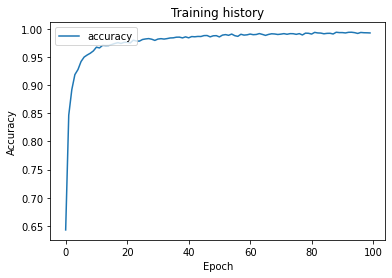

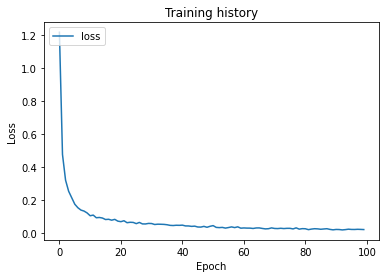

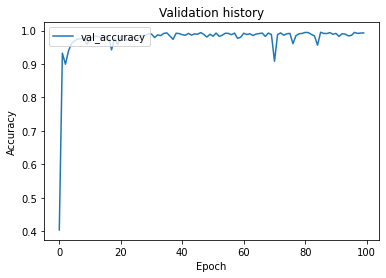

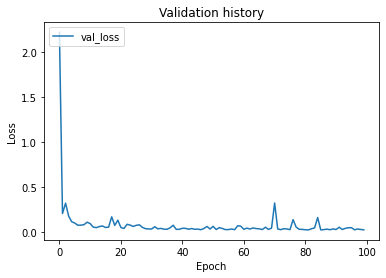

In [ ]:
show_train_history(history_all, 'Epoch', 'Accuracy', ('accuracy',), 'Training history')
show_train_history(history_all, 'Epoch', 'Loss', ('loss',), 'Training history')
show_train_history(history_all, 'Epoch', 'Accuracy', ('val_accuracy',), 'Validation history')
show_train_history(history_all, 'Epoch', 'Loss', ('val_loss',), 'Validation history')

In [ ]:
Y_pred = model.predict(val_generator)

In [ ]:
y_pred = np.argmax(Y_pred, axis=1)

In [ ]:
print('Confusion Matrix')
print(confusion_matrix(val_generator.classes, y_pred))
print('Classification Report')
CLASS_NAMES= ['basophil', 'eosinophil', 'lymphocyte', 'monocyte', 'neutrophil']
print(classification_report(val_generator.classes, y_pred, target_names=CLASS_NAMES))

Confusion Matrix
[[237   1   1   2   0]
 [  0 605   0   0   3]
 [  0   0 235   2   0]
 [  0   0   2 274   1]
 [  1   1   1   4 647]]
Classification Report
              precision    recall  f1-score   support

    basophil       1.00      0.98      0.99       241
  eosinophil       1.00      1.00      1.00       608
  lymphocyte       0.98      0.99      0.99       237
    monocyte       0.97      0.99      0.98       277
  neutrophil       0.99      0.99      0.99       654

    accuracy                           0.99      2017
   macro avg       0.99      0.99      0.99      2017
weighted avg       0.99      0.99      0.99      2017



In [ ]:
from google.colab import files
files.download('AlexNet.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>